In [2]:
import pandas as pd
label_df = pd.read_csv('./train.csv')
label_df.head()

,file_name,label
0,001.PNG,9
1,002.PNG,4
2,003.PNG,1
3,004.PNG,1
4,005.PNG,6


In [3]:
import os
from glob import glob

def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    
    # get image path
    img_path_list.extend(glob(os.path.join(data_dir, '*.PNG')))
    
    for idx in range(img_path_list.__len__()): img_path_list[idx] = img_path_list[idx].replace("\\", "/")
    img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))
    print(img_path_list)
        
    # get label
    label_list.extend(label_df['label'])
                
    return img_path_list, label_list

def get_test_data(data_dir):
    img_path_list = []
    
    # get image path
    img_path_list.extend(glob(os.path.join(data_dir, '*.PNG')))
    for idx in range(img_path_list.__len__()): img_path_list[idx] = img_path_list[idx].replace("\\", "/")
    img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))
    #print(img_path_list)
    
    return img_path_list

In [4]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  723 non-null    object
 1   label      723 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.4+ KB


In [8]:
all_img_path, all_label = get_train_data('C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train')
test_img_path = get_test_data('C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/test')

['C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/001.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/002.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/003.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/004.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/005.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/006.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/007.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/008.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/009.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/010.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/011.PNG', 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul 

In [9]:
all_label[:5]

[9, 4, 1, 1, 6]

In [10]:
print(len(all_label))

723


In [11]:
all_img_path[:5]

['C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/001.PNG',
 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/002.PNG',
 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/003.PNG',
 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/004.PNG',
 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/train/005.PNG']

In [12]:
print(len(all_img_path))

723


In [13]:
test_img_path[:5]

['C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/test/001.PNG',
 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/test/002.PNG',
 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/test/003.PNG',
 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/test/004.PNG',
 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/test/005.PNG']

In [14]:
print(len(test_img_path))

199


In [15]:
import torch
import torch.nn as nn

os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "2"  # Set the GPU 2 to use, 멀티 gpu

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

C:\Users\OH\Anaconda3\envs\pytorch1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device(type='cpu')

In [16]:
#GPU 체크 및 할당
if torch.cuda.is_available():    
    #device = torch.device("cuda:0")
    print('Device:', device)
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

No GPU available, using the CPU instead.


In [17]:
#하이퍼 파라미터 튜닝

CFG = {
    'IMG_SIZE':128, #이미지 사이즈
    'EPOCHS':1000, #에포크
    'LEARNING_RATE':0.02, #학습률
    'BATCH_SIZE':32, #배치사이즈
    'SEED':41, #시드
}

In [18]:
import torchvision.datasets as datasets # 이미지 데이터셋 집합체
import torchvision.transforms as transforms # 이미지 변환 툴

from torch.utils.data import DataLoader # 학습 및 배치로 모델에 넣어주기 위한 툴
from torch.utils.data import DataLoader, Dataset

import cv2

class CustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, train_mode=True, transforms=None): #필요한 변수들을 선언
        self.transforms = transforms
        self.train_mode = train_mode
        self.img_path_list = img_path_list
        self.label_list = label_list

    def __getitem__(self, index): #index번째 data를 return
        img_path = self.img_path_list[index]
        # Get image data
        image = cv2.imread(img_path)
        if self.transforms is not None:
            image = self.transforms(image)

        if self.train_mode:
            label = self.label_list[index]
            return image, label
        else:
            return image
    
    def __len__(self): #길이 return
        return len(self.img_path_list)

In [19]:
tempdataset = CustomDataset(all_img_path, all_label, train_mode=False)

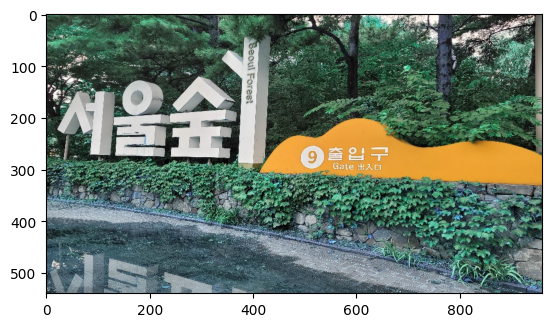

In [20]:
import matplotlib.pyplot as plt

plt.imshow(tempdataset.__getitem__(0))

In [21]:
# Train : Validation = 0.75 : 0.25 Split
train_len = int(len(all_img_path)*0.75)
Vali_len = int(len(all_img_path)*0.25)

train_img_path = all_img_path[:train_len]
train_label = all_label[:train_len]

vali_img_path = all_img_path[train_len:]
vali_label = all_label[train_len:]

In [22]:
print('train set 길이 : ', train_len)
print('vaildation set 길이 : ', Vali_len)

train set 길이 :  542
vaildation set 길이 :  180


In [23]:
# train_transform = transforms.Compose([
#                     transforms.ToPILImage(),  # Numpy 배열에서 PIL 이미지로
#                     transforms.Resize([CFG['IMG_SIZE'],CFG['IMG_SIZE']]), # 이미지 사이즈 변형
#                     transforms.ToTensor(), # 이미지 데이터를 tensor
#                     transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5)), # 이미지 정규화
#                     transforms.RandomRotation(30),
#                     transforms.RandomHorizontalFlip(),
#                     transforms.RandomVerticalFlip(),
#                     transforms.RandomErasing()
#                     ])

# test_transform = transforms.Compose([
#                     transforms.ToPILImage(),
#                     transforms.Resize([CFG['IMG_SIZE'],CFG['IMG_SIZE']]),
#                     transforms.ToTensor(),
#                     transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))
#                     ])

In [24]:
# train_transform = transforms.Compose([
#                     transforms.ToPILImage(),  # Numpy 배열에서 PIL 이미지로
#                     transforms.Resize([CFG['IMG_SIZE'],CFG['IMG_SIZE']]), # 이미지 사이즈 변형
#                     transforms.ToTensor(), # 이미지 데이터를 tensor
#                     transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5)), # 이미지 정규화
#                     transforms.RandomRotation(30),
#                     transforms.RandomHorizontalFlip(),
#                     transforms.RandomVerticalFlip(),
#                     transforms.RandomErasing()
#                     ])

# test_transform = transforms.Compose([
#                     transforms.ToPILImage(),
#                     transforms.Resize([CFG['IMG_SIZE'],CFG['IMG_SIZE']]),
#                     transforms.ToTensor(),
#                     transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))
#                     ])

In [25]:
train_transform = transforms.Compose([
                    transforms.ToPILImage(),  # Numpy 배열에서 PIL 이미지로
                    transforms.Resize([CFG['IMG_SIZE'],CFG['IMG_SIZE']]), # 이미지 사이즈 변형
                    transforms.ToTensor(), # 이미지 데이터를 tensor
                    transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5)), # 이미지 정규화
                    transforms.RandomRotation(30),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomVerticalFlip(),
                    transforms.RandomErasing()
                    ])

test_transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize([CFG['IMG_SIZE'],CFG['IMG_SIZE']]),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))
                    ])

In [26]:
# train_transform = transforms.Compose([
#                     transforms.ToPILImage(), #Numpy배열에서 PIL이미지로
#                     # transforms.RandomResizedCrop(224),
#                     # transforms.RandomRotation(degrees = (0, 360)),
#                     transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]), #이미지 사이즈 변형
#                     # transforms.RandomPerspective(),
#                     transforms.ToTensor(), #이미지 데이터를 tensor
#                     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)), #이미지 정규화
#                     transforms.RandomHorizontalFlip(),
#                     transforms.RandomVerticalFlip(),
#                     transforms.RandomErasing()
#                     ])

# test_transform = transforms.Compose([
#                     transforms.ToPILImage(),
#                     transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]),
#                     # transforms.CenterCrop(224),
#                     transforms.ToTensor(),
#                     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
#                     # transforms.RandomHorizontalFlip(),
#                     # transforms.RandomVerticalFlip()
#                     ])

In [27]:
# Get Dataloader

#CustomDataset class를 통하여 train dataset생성
train_dataset = CustomDataset(train_img_path, train_label, train_mode=True, transforms=train_transform) 
#만든 train dataset를 DataLoader에 넣어 batch 만들기
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=0)

#vaildation 에서도 적용
vali_dataset = CustomDataset(vali_img_path, vali_label, train_mode=True, transforms=test_transform)
vali_loader = DataLoader(vali_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)

In [33]:
train_loader

In [28]:
train_batches = len(train_loader)
vali_batches = len(vali_loader)

print('total train imgs :',train_len,'/ total train batches :', train_batches)
print('total valid imgs :',Vali_len, '/ total valid batches :', vali_batches)

total train imgs : 542 / total train batches : 17
total valid imgs : 180 / total valid batches : 6


In [31]:
from tqdm import tqdm

def train(model, optimizer, train_loader, scheduler, device): 
    model.to(device)
    n = len(train_loader)
    best_loss = np.inf
    cnt = 0
    
    for epoch in range(1,CFG["EPOCHS"]+1): #에포크 설정
        model.train() #모델 학습
        running_loss = 0.0
            
        for img, label in tqdm(iter(train_loader)):
            img, label = img.to(device), label.to(device) #배치 데이터
            optimizer.zero_grad() #배치마다 optimizer 초기화
        
            # Data -> Model -> Output
            logit = model(img) #예측값 산출
            loss = criterion(logit, label) #손실함수 계산
            
            # 역전파
            loss.backward() #손실함수 기준 역전파 
            optimizer.step() #가중치 최적화
            running_loss += loss.item()
            
        train_loss = running_loss / len(train_loader)      
        print('[%d] Train loss: %.10f' %(epoch, running_loss / len(train_loader)))
        
        if scheduler is not None:
            scheduler.step()
            
        #Validation set 평가
        model.eval() #evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수
        vali_loss = 0.0
        correct = 0
        with torch.no_grad(): #파라미터 업데이트 안하기 때문에 no_grad 사용
            for img, label in tqdm(iter(vali_loader)):
                img, label = img.to(device), label.to(device)

                logit = model(img)
                vali_loss += criterion(logit, label)
                pred = logit.argmax(dim=1, keepdim=True)  #11개의 class중 가장 값이 높은 것을 예측 label로 추출
                correct += pred.eq(label.view_as(pred)).sum().item() #예측값과 실제값이 맞으면 1 아니면 0으로 합산
        vali_acc = 100 * correct / len(vali_loader.dataset)
        vali_losses = vali_loss / len(vali_loader)
        print('Vail set: Loss: {:.4f}, Accuracy: {}/{} ( {:.0f}%)\n'.format(vali_loss / len(vali_loader), correct, len(vali_loader.dataset), 100 * correct / len(vali_loader.dataset)))
        
        #베스트 모델 저장
        # -> 카운트 = 0
        if best_loss >= vali_losses:
            best_loss = vali_losses
            torch.save(model.state_dict(), 'C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/best_model.pth') #이 디렉토리에 best_model.pth을 저장
            print('Model Saved.')
            cnt = 0
                
        # 학습 실패 -> 쌓는다 -> 카운트
        if best_loss <= vali_losses:
            cnt = cnt + 1
            print('cnt : ' , cnt)
            if cnt > 50:
                break

In [26]:
import torch.optim as optim
from tqdm.auto import tqdm
import torch.nn as nn
from torchvision import models

resnet = models.resnet18(pretrained = True).to(device)
for param in resnet.parameters():
    param.requries_grad = False
    
in_features = resnet.fc.in_features

classifier = nn.Sequential(
    nn.Linear(in_features, 1024),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(1024, 10)
)

resnet.fc = classifier

criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params = resnet.parameters(), lr = CFG['LEARNING_RATE'])
optimizer = torch.optim.SGD(params = resnet.parameters(), lr = CFG['LEARNING_RATE'], momentum = 0.9)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100, eta_min=0.001, last_epoch=-1, verbose=False)

resnet
# resnet.to(device)

C:\Users\OH\Anaconda3\envs\pytorch1\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\OH\Anaconda3\envs\pytorch1\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
# pip install torchsummary

In [28]:
from torchsummary import summary
summary(resnet,(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
       BasicBlock-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
             ReLU-14           [-1, 64,

In [29]:
import numpy as np

train(resnet, optimizer, train_loader, scheduler, device)

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:19<00:00,  1.16s/it]


[1] Train loss: 1.5625617154


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.36it/s]


Vail set: Loss: 1.0826, Accuracy: 116/181 ( 64%)

Model Saved.
cnt :  1


 53%|███████████████████████████████████████████▉                                       | 9/17 [00:09<00:08,  1.07s/it]


KeyboardInterrupt: 

In [ ]:
def predict(model, test_loader, device):
    model.eval()
    model_pred = []
    with torch.no_grad():
        for img in tqdm(iter(test_loader)):
            img = img.to(device)

            pred_logit = model(img)
            pred_logit = pred_logit.argmax(dim=1, keepdim=True).squeeze(1)

            model_pred.extend(pred_logit.tolist())
    return model_pred

In [ ]:
test_dataset = CustomDataset(test_img_path, None, train_mode=False, transforms=test_transform)
test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)

# Validation Accuracy가 가장 뛰어난 모델을 불러옵니다.
checkpoint = torch.load('C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/best_model.pth')
model = resnet.to(device)
model.load_state_dict(checkpoint)

# Inference
preds = predict(model, test_loader, device)
preds[0:5]

In [ ]:
submission = pd.read_csv('C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/sample_submission.csv')
submission['label'] = preds

In [ ]:
submission.head()

In [ ]:
submission.to_csv('C:/Users/OH/Desktop/Study/2022-02-01/Modeling/Seoul Landmark/dataset/submission.csv', index=False)